In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
df = pd.DataFrame(data = wine.data,columns = wine.feature_names)
df['label'] = wine.target
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [5]:
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [6]:
x = wine.data
y = wine.target

In [7]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

In [8]:
l = mutual_info_regression(x,y)

In [9]:
l

array([0.46810556, 0.27780777, 0.0652565 , 0.26979824, 0.19509591,
       0.41867015, 0.66783205, 0.15953063, 0.28631685, 0.55854883,
       0.4468394 , 0.49913597, 0.56254002])

In [10]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
label                             int32
dtype: object

In [11]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

<BarContainer object of 13 artists>

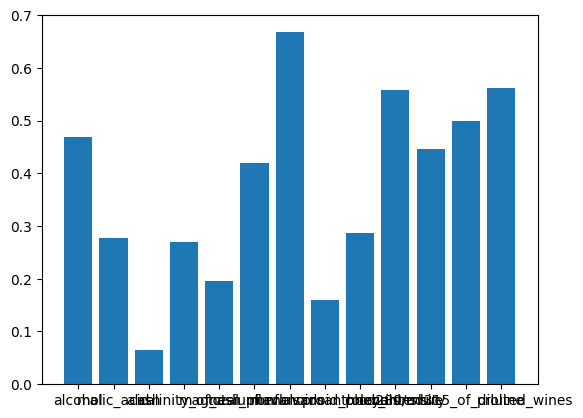

In [12]:
plt.bar(['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium',
       'total_phenols','flavanoids','nonflavanoid_phenols',
       'proanthocyanins','color_intensity','hue',
       'od280/od315_of_diluted_wines','proline'],l)

#plt.bar(['bmi','bp','s1','s2','s3','s4','s5'],l)

# correaltion

In [13]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

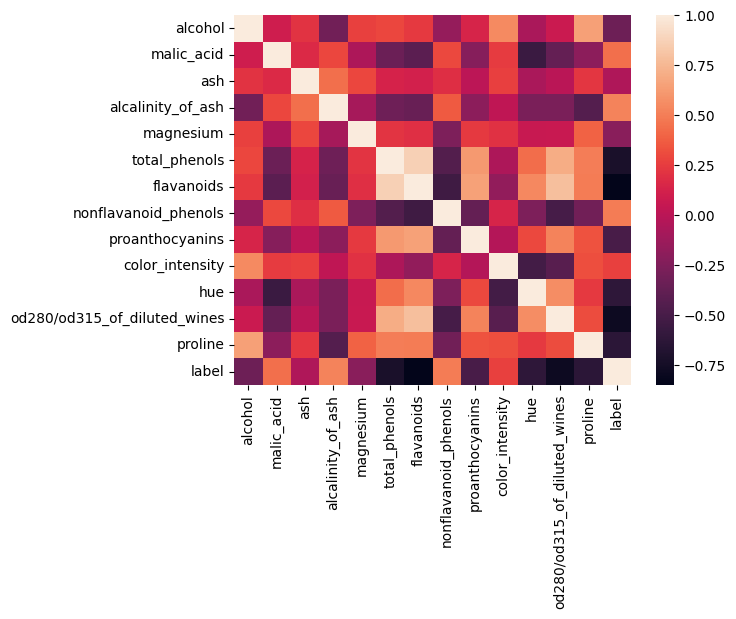

In [14]:
sns.heatmap(df.corr())

# filter method(information gain(IG))

In [15]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
x=df.drop(['label'],axis =1)
y=df['label']

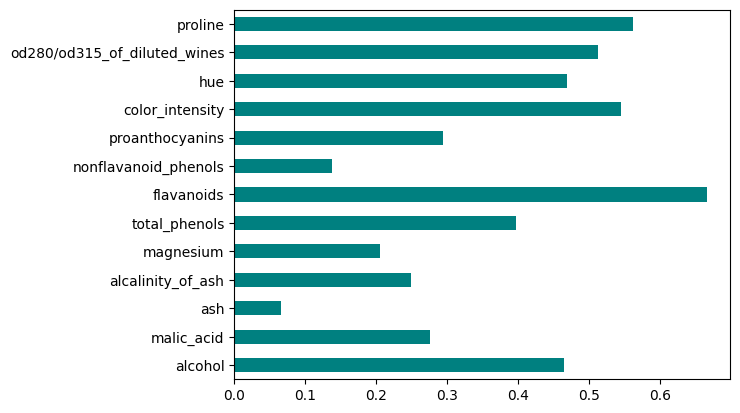

In [17]:
importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

# chi square test

The chi-square test is used for catagorical features in a dataset.we calulate chi-square between each feature and the target and select the desired no. of features with the best chi-aquareed to testthe relation b/w various features in the dataset and the targe

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
x_cat = x.astype(int)

In [20]:
chi2_features = SelectKBest(chi2,k=3)
x_kbest_features = chi2_features.fit_transform(x,y)
print("original",x.shape[1])
print("reduced",x_kbest_features.shape[1])


original 13
reduced 3


# fisher's score

In [21]:
from skfeature.function.similarity_based import fisher_score

In [22]:
new_x= np.array(x)
new_y=np.array(y)

In [23]:
ranks = fisher_score.fisher_score(new_x,new_y)

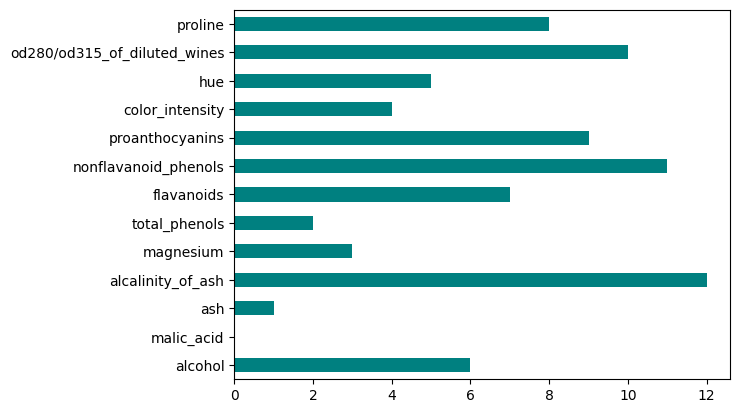

In [24]:
feat_importances=pd.Series(ranks,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
l = LogisticRegression()

In [56]:
l.fit(x_train,y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred = l.predict(x_test)

In [58]:
y_pred

array([0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0,
       1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2])

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#elbow method to choose k
error_rate = []
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    error_rate.append(np.mean(prediction != y_test))

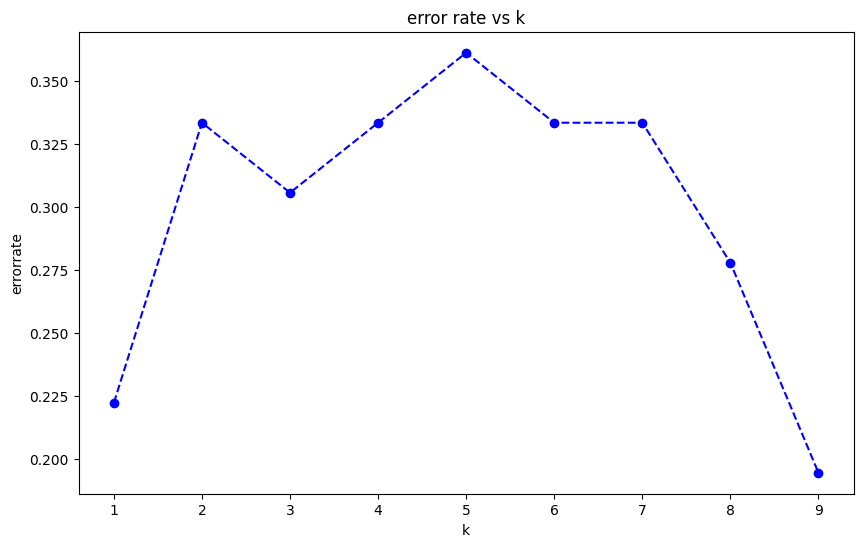

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle = 'dashed',marker='o')
plt.title('error rate vs k')
plt.xlabel('k')
plt.ylabel('errorrate')
plt.show()

In [30]:
#error rate jyada se kam honi cahiye

In [46]:
result_df = pd.DataFrame(columns =["Model","Accuracy score"])
models = [("KNN",KNeighborsClassifier(n_neighbors=9))]

for name,model in models:
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    performance_score = accuracy_score(y_test,prediction)
    new_row = {"Model":name,"Accuracy score":performance_score}
    #result_df = result_df.append(new_row,ignore_index=True)
    print(new_row)

{'Model': 'KNN', 'Accuracy score': 0.8055555555555556}


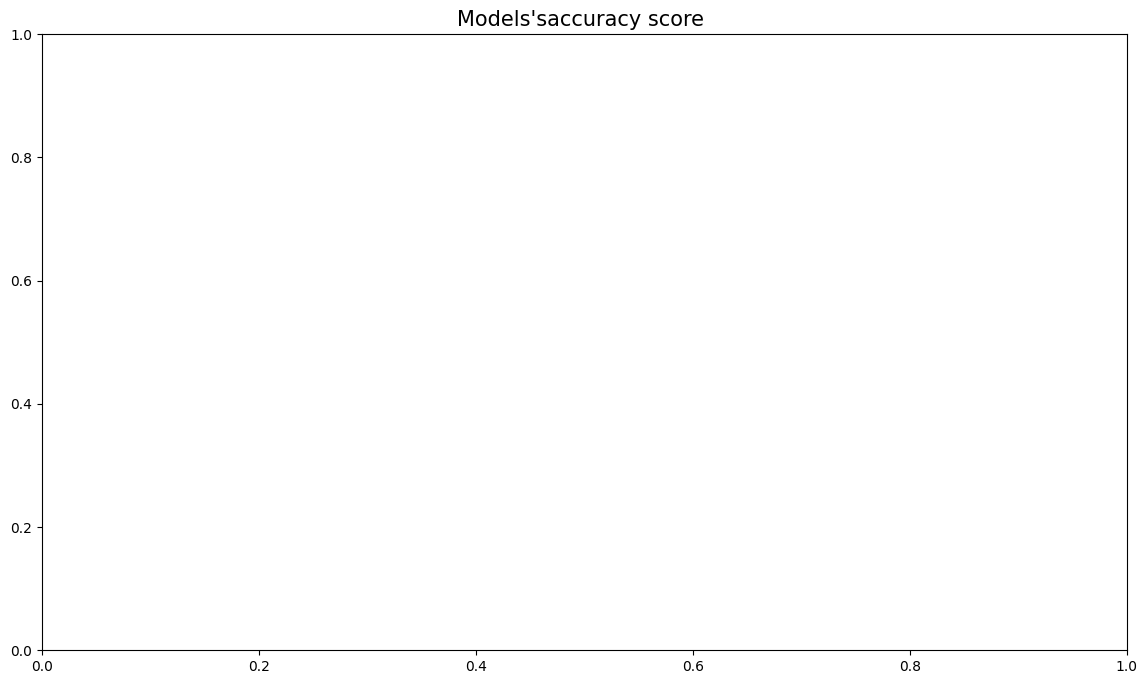

In [45]:
plt.figure(figsize=(14,8))
sns.barplot(x=result_df["Model"],y=result_df["Accuracy score"])
plt.title("Models'saccuracy score ",size=15)
plt.show()

In [ ]:
accuracy_score()

<Axes: >

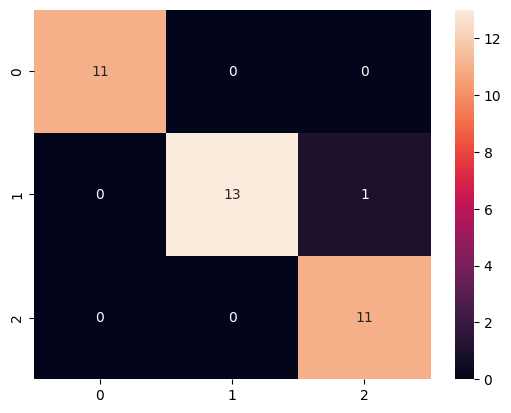

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)